In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from IPython.display import Image, display
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [71]:
#-----------------Used for plotting purposes later--------------------------
def plot_decisionBoundary(X,Y,classifier,X_test = None,Y_test = None,save = False):
    #Get boundary box dimensions for the mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   # markers = ('o','x')
    colors = ('hotpink','blue','lightgreen')
    colors2 = ('red','navy','green')
    markers = ('s','x','o')
    markers2 = ('+','^','*')
    #colors = ('red','blue','lightgreen','gray')
    cmap = ListedColormap(colors)
    cmap2 = ListedColormap(colors2)
    #Generate uniformly spaced points to get decision boundary
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
    mesh_data = np.column_stack([xx.ravel(),yy.ravel()])
    boundary_data = classifier.predict(mesh_data)
    boundary_data = boundary_data.reshape(xx.shape)
    plt.contourf(xx, yy, boundary_data,cmap = cmap, alpha=0.5)
    sct1 = []
    sct2 = []
    predicted_train = classifier.predict(X)
    for idx, cl in enumerate(np.unique(Y)):
        sct1.append(plt.scatter(x=X[Y==cl,0], y = X[Y==cl,1],alpha = 0.6, c =cmap(idx),marker =markers[idx],label = "Training class: {}".format(cl)))
    plt.title("Decision Boundary")
    if(X_test is not None):
        predicted = classifier.predict(X_test)
        for idx, cl in enumerate(np.unique(Y_test)):
            sct2.append(plt.scatter(X_test[Y_test == cl,0],X_test[Y_test == cl,1],c=cmap2(idx),alpha=1.0,marker=markers2[idx], label = "Test class: {}".format(cl)))
    plt.legend(handles=sct1 + sct2,loc = 'best')
    if save:
        plt.savefig('Notebook_Images/LogisticIRIS')
    plt.show()
    err_train = np.sum(Y != predicted_train)
    err = np.sum(Y_test != predicted)
    M = Y.shape[0]
    N = Y_test.shape[0]
    print("Training Accuracy {:.2f}%, with {} out of  {} correctly classified.".format((1-err_train/M)*100,M-err_train,M))
    print("Test Accuracy {:.2f}%, with {} out of  {} correctly classified.".format((1-err/N)*100,N-err,N))



def plot_decisionBoundary_TF(X,Y,session,X_test = None,Y_test = None):
    #Get boundary box dimensions for the mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   # markers = ('o','x')
    colors = ('hotpink','blue','lightgreen')
    colors2 = ('red','navy','green')
    markers = ('s','x','o')
    markers2 = ('+','^','*')
    #colors = ('red','blue','lightgreen','gray')
    cmap = ListedColormap(colors)
    cmap2 = ListedColormap(colors2)
    #Generate uniformly spaced points to get decision boundary
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
    mesh_data = np.column_stack([xx.ravel(),yy.ravel()])
    
    predicted_probs = probs.eval(feed_dict = {x: mesh_data}).flatten()
    boundary_data  = np.zeros(predicted_probs.shape[0],dtype=np.int32)
    index = np.where(predicted_probs > 0.5)
    boundary_data[index] = 1
    boundary_data = boundary_data.reshape(xx.shape)
    plt.contourf(xx, yy, boundary_data,cmap = cmap, alpha=0.5)
    sct1 = []
    sct2 = []
    predicted_probs = probs.eval(feed_dict = {x: X}).flatten()
    predicted_train  = np.zeros(predicted_probs.shape[0],dtype=np.int32)
    index = np.where(predicted_probs > 0.5)
    predicted_train [index] = 1
    
    for idx, cl in enumerate(np.unique(Y)):
        sct1.append(plt.scatter(x=X[Y==cl,0], y = X[Y==cl,1],alpha = 0.6, c =cmap(idx),marker =markers[idx],label = "Training class: {}".format(cl)))
    plt.title("Decision Boundary")
    if(X_test is not None):
        predicted_probs = probs.eval(feed_dict = {x: X_test}).flatten()
        predicted  = np.zeros(predicted_probs.shape[0],dtype=np.int32)
        index = np.where(predicted_probs > 0.5)
        predicted[index] = 1
        for idx, cl in enumerate(np.unique(Y_test)):
            sct2.append(plt.scatter(X_test[Y_test == cl,0],X_test[Y_test == cl,1],c=cmap2(idx),alpha=1.0,marker=markers2[idx], label = "Test class: {}".format(cl)))
    plt.legend(handles=sct1 + sct2,loc = 'best')
    plt.show()
    err_train = np.sum(Y != predicted_train)
    err = np.sum(Y_test != predicted)
    M = Y.shape[0]
    N = Y_test.shape[0]
    print("Training Accuracy {:.2f}%, with {} out of  {} correctly classified.".format((1-err_train/M)*100,M-err_train,M))
    print("Test Accuracy {:.2f}%, with {} out of  {} correctly classified.".format((1-err/N)*100,N-err,N))
    return

# Logistic regression 

## Model the log odds ratio as a linear function

$$\log\big(\frac{P(Y=1)}{P(Y=0)}\big)=\beta_0+\beta_1 X_1+\beta_1 X_2+...+\beta_1 X_{p}$$

or just

$$P(Y=1)= \frac{\exp(\beta_0 +\beta^T X)}{1+\exp(\beta_0 +\beta^T X)}= \frac{1}{1+\exp(-(\beta_0 +\beta^T X))}$$

We define the sigmoid function 
$$\sigma(z)=\frac{1}{1+exp(-z)}$$

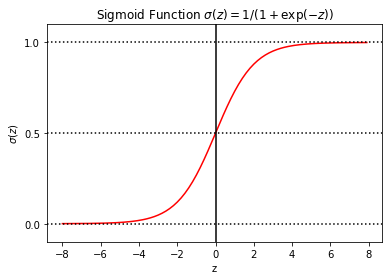

In [3]:
#Visualize the sigmoid/logistic function z input parameter
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

z = np.arange(-8,8,0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z,color = 'red')
plt.title(r"Sigmoid Function $\sigma(z) =1/(1+\exp(-z))$")
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')
#display y-axis
plt.axvline(0.0, color = 'k')
#add a horizontal line at sigmoid(z) = 0.5
plt.axhline(y = 0.5, ls = 'dotted', color= 'k')
#Add asymptotes
plt.axhline(y = 1.0, ls = 'dotted', color= 'k')
plt.axhline(y = 0, ls = 'dotted', color= 'k')

#Set the tick marks to only include the important steps of y
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1,1.1)
plt.show()

Note: 
$$0<\phi(z)<1$$
$$\lim_{z\rightarrow +\infty}\phi(z)\rightarrow 1 \text{ and }\lim_{z\rightarrow -\infty}\phi(z)\rightarrow 0$$

## We now explore the Iris dataset
Fisher, R. A. (1936). The Use of Multiple Measurements in Axonomic Problems. Annals of Eugenics 7, 179-188. 

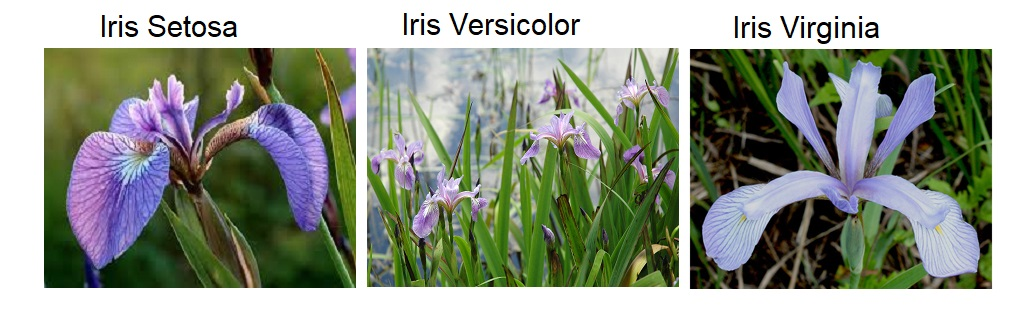

In [4]:
Image('Notebook_Images/Iris.jpg')

Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica

In [52]:
iris_dir = "./../Data/iris.data"
iris_names = ['sepal length','sepal width','pedal length','pedal width','Iris Type']
data_types = {'sepal length':np.float32,'sepal width':np.float32,'pedal length':np.float32,'pedal width':np.float32,'Iris Type':np.str}
data = pd.read_csv(iris_dir,sep = ",",names = iris_names,dtype = data_types )

In [53]:
#Preview the first 5 observations
data.head()

,sepal length,sepal width,pedal length,pedal width,Iris Type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
data.corr()

,sepal length,sepal width,pedal length,pedal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
pedal length,0.871754,-0.420516,1.000000,0.962757
pedal width,0.817954,-0.356544,0.962757,1.000000


In [54]:
#Subset the dataset to have only 2 features for visual purposes
#We also take only the first 100 observations for a 2 class problem
data_sepal = data[['sepal length','sepal width']].iloc[0:100]

In [55]:
#Convert class names to either 0:Iris-setosa 1:Iris-versicolor 2:Iris-virginica
iris_classes = pd.DataFrame({'Iris classes':pd.Categorical(data['Iris Type']).codes}).iloc[0:100]
data_sepal = pd.concat([data_sepal,iris_classes],axis=1)
data_sepal.tail()

,sepal length,sepal width,Iris classes
95,5.7,3.0,1
96,5.7,2.9,1
97,6.2,2.9,1
98,5.1,2.5,1
99,5.7,2.8,1


In [56]:
#Randomly split training and test set
#100 training / 20 test
Data_train, Data_test = train_test_split(data_sepal, test_size = 0.2, random_state = 123)

X = Data_train[['sepal length','sepal width']].as_matrix()
Y = Data_train['Iris classes'].as_matrix()
X_test = Data_test[['sepal length','sepal width']].as_matrix()
Y_test = Data_test['Iris classes'].as_matrix()

## Let us implement the logistic regression model using gradient descent

In [57]:
class Logistic(object):
    def __init__(self,lr=0.01,max_iter=100,tol = 10e-2):
        self.lr = lr
        self.max_iter = max_iter
        self.tol = tol
    def affine(self,X):
        return np.dot(X,self.w[1:])+self.w[0]
    def sigmoid(self,X):
        return np.exp(self.affine(X))/(1+np.exp(self.affine(X)))
    def fit(self,X,y):
        #beta0,beta1,...,betap initialize to 0 vector
        self.w = np.zeros(1+X.shape[1])
        z = np.ones(1+X.shape[1])
        for _ in range(self.max_iter):
            prev = np.copy(self.w)
            self.w[0] += self.lr*(np.sum(y-(1-self.sigmoid(X))*np.exp(self.w[0])))
            self.w[1:] += self.lr*(np.dot(X.T,y-self.sigmoid(X)))
            z= prev-self.w
            if np.matmul(z.T,z) < self.tol:
                break
        return self
    def predict(self,X):
        labels = np.zeros(X.shape[0])
        for i in np.arange(X.shape[0]):
            if(self.sigmoid(X[i,:])>0.5):
                labels[i] = 1
            else:
                labels[i] = 0
        return labels

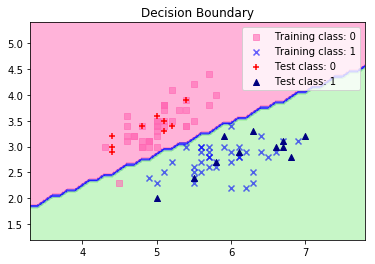

Training Accuracy 98.75%, with 79 out of  80 correctly classified.
Test Accuracy 100.00%, with 20 out of  20 correctly classified.


In [58]:
lg = Logistic(lr=0.1,max_iter=2000,tol=10e-10)
lg.fit(X,Y)
1-np.sum(np.abs(lg.predict(X)-Y))/X.shape[0]
plot_decisionBoundary(X,Y,lg,X_test = X_test,Y_test = Y_test,save = True)

## Using the scikit-learn implementation for Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

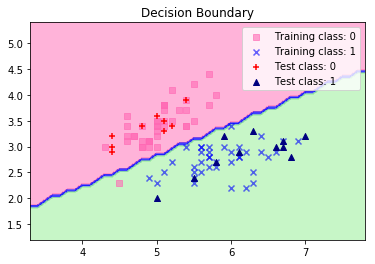

Training Accuracy 98.75%, with 79 out of  80 correctly classified.
Test Accuracy 100.00%, with 20 out of  20 correctly classified.


In [60]:
plot_decisionBoundary(X,Y,lr,X_test,Y_test)

## Using the stochastic gradient descent package of scikit-Learn

Classifier losses for SGD

    "hinge": (soft-margin) linear Support Vector Machine
    "modified_huber": smoothed hinge loss
    "log": logistic regression


In [65]:
from sklearn.linear_model import SGDClassifier
lr_SGD =  SGDClassifier(loss="log",max_iter = 20,tol = 10e-10,penalty=None)
lr_SGD.fit(X,Y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=20, n_iter=None,
       n_jobs=1, penalty=None, power_t=0.5, random_state=None,
       shuffle=True, tol=1e-09, verbose=0, warm_start=False)

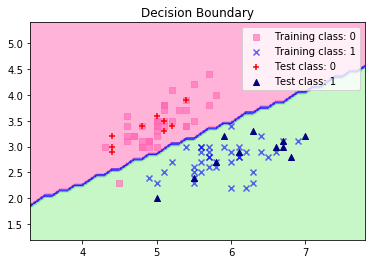

Training Accuracy 98.75%, with 79 out of  80 correctly classified.
Test Accuracy 100.00%, with 20 out of  20 correctly classified.


In [66]:
plot_decisionBoundary(X,Y,lr_SGD,X_test,Y_test)

## 3 class problem (Multinomial)

In [16]:
data_sepal = data[['sepal length','sepal width']]
#Convert class names to either 0:Iris-setosa 1:Iris-versicolor 2:Iris-virginica
iris_classes = pd.DataFrame({'Iris classes':pd.Categorical(data['Iris Type']).codes})
data_sepal = pd.concat([data_sepal,iris_classes],axis=1)
data_sepal.tail()

,sepal length,sepal width,Iris classes
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2
149,5.9,3.0,2


In [17]:
#Randomly split training and test set
#120 training / 30 test
Data_train, Data_test = train_test_split(data_sepal, test_size = 0.2, random_state = 123)

In [18]:
X = Data_train[['sepal length','sepal width']].as_matrix()
Y = Data_train['Iris classes'].as_matrix()
X_test = Data_test[['sepal length','sepal width']].as_matrix()
Y_test = Data_test['Iris classes'].as_matrix()

In [19]:
lr = LogisticRegression(random_state = 123)
lr.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

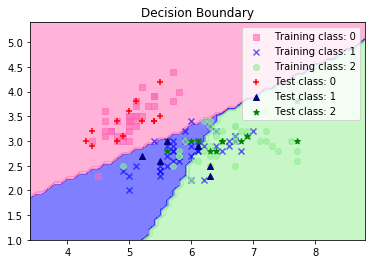

Training Accuracy 78.33%, with 94 out of  120 correctly classified.
Test Accuracy 83.33%, with 25 out of  30 correctly classified.


In [20]:
plot_decisionBoundary(X ,Y,lr,X_test,Y_test)

In [21]:
#Standardizing and using regularization
#Very important to use standardization if regularization is used
#All features need to be on the same scale
sc = StandardScaler()
#Initialize the object
#Note the train and test sets are standardized using the same mean/sd for comparability
sc.fit(X)
X = sc.transform(X)
sc.fit(X_test)
X_test = sc.transform(X_test)

lr_smooth = LogisticRegression(penalty = 'l1',C=100,random_state = 123)
lr_smooth.fit(X,Y)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

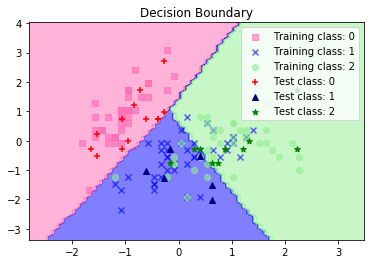

Training Accuracy 80.00%, with 96 out of  120 correctly classified.
Test Accuracy 93.33%, with 28 out of  30 correctly classified.


In [22]:
plot_decisionBoundary(X ,Y,lr_smooth,X_test,Y_test)

# We explore the same dataset and algorithm using TensorFlow

In [23]:
import tensorflow as tf

In [24]:
#Subset the dataset to have only 2 features for visual purposes
#We also take only the first 100 observations for a 2 class problem
data_sepal = data[['sepal length','sepal width']].iloc[0:100]
#Convert class names to either 0:Iris-setosa 1:Iris-versicolor 2:Iris-virginica
iris_classes = pd.DataFrame({'Iris classes':pd.Categorical(data['Iris Type']).codes}).iloc[0:100]
data_sepal = pd.concat([data_sepal,iris_classes],axis=1)
#Randomly split training and test set
#100 training / 20 test
Data_train, Data_test = train_test_split(data_sepal, test_size = 0.2, random_state = 123)

X = Data_train[['sepal length','sepal width']].as_matrix()
Y = Data_train['Iris classes'].as_matrix()
X_test = Data_test[['sepal length','sepal width']].as_matrix()
Y_test = Data_test['Iris classes'].as_matrix()

xdim = X.shape[1]

In [25]:
#Reset default graph prior to interactive session(good habit prevents duplicate graphs)
tf.reset_default_graph()
sess = tf.InteractiveSession()

x  = tf.placeholder(tf.float32, shape=[None,xdim])
y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.truncated_normal([xdim,1], stddev=0.02),name ="Weights")
b = tf.Variable(tf.truncated_normal([1],stddev=0.02),name ="Bias")

linear_part = tf.matmul(x,W)+b

loss =  tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = linear_part, labels=y))
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)

probs = tf.nn.sigmoid(linear_part)

init_op = tf.global_variables_initializer()  
sess.run(init_op)    

In [26]:
N = 1000
for i in range(N):
    training_dict = {x: X, y:Y.reshape([Y.shape[0],1])}
    train_step.run(feed_dict=training_dict)

In [27]:
predicted_probs = probs.eval(feed_dict = {x: X_test}).flatten()
print(predicted_probs.flatten())
predicted = np.zeros(predicted_probs.shape[0],dtype=np.int32)
index = np.where(predicted_probs > 0.5)
predicted [index] = 1

[ 0.10518845  0.70543301  0.9580372   0.09340169  0.95323271  0.04361872
  0.01442418  0.98535985  0.97709298  0.0197908   0.11260097  0.97835404
  0.99649185  0.98639011  0.02971736  0.02470589  0.98690909  0.06583684
  0.82846105  0.98235321]


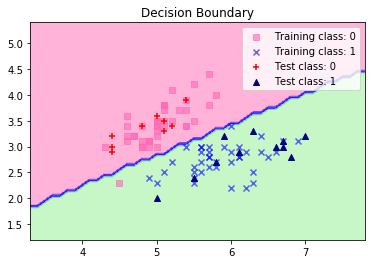

Training Accuracy 98.75%, with 79 out of  80 correctly classified.
Test Accuracy 100.00%, with 20 out of  20 correctly classified.


In [28]:
plot_decisionBoundary_TF(X,Y,sess,X_test = X_test,Y_test = Y_test)